# What are the most demanded skills for the top 3 most popular data roles for both India and United States?

### Methodology
- Clean-up skill column
- Calculate skill count based on job_title_short
- Calculate skill percentage
- Plot final findings

### Import Libraries and Data

In [2]:
# Importing the Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter Data for the India
Filter the data for the market of the India.

In [3]:
df_IND = df[df['job_country'] == 'India']

### Explode Skills
Converts the `job_skills` column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row.

It then displays the `job_title` and `job_skills` columns, allowing us to analyze the distribution of skills across different data job titles.

In [4]:
df_skills = df_IND.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785716,Software Engineer,c#
785716,Software Engineer,sql
785718,Business Analyst,None
785740,Software Engineer,aws


### Count Skills per Job Title
Groups DataFrame by `job_skills` and `job_title_short`, counting the occurrences of each skill within each job title.

Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. 

The final DataFrame, `df_skills_count`, shows the frequency of each skill with each job title.

In [5]:
# # Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count

job_skills  job_title_short      
airflow     Business Analyst           19
            Cloud Engineer             29
            Data Analyst               89
            Data Engineer            2990
            Data Scientist            327
                                     ... 
zoom        Data Scientist             32
            Senior Data Analyst         1
            Senior Data Engineer       14
            Senior Data Scientist       4
            Software Engineer          11
Length: 1689, dtype: int64

In [6]:
# # Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,19
1,airflow,Cloud Engineer,29
2,airflow,Data Analyst,89
3,airflow,Data Engineer,2990
4,airflow,Data Scientist,327
...,...,...,...
1684,zoom,Data Scientist,32
1685,zoom,Senior Data Analyst,1
1686,zoom,Senior Data Engineer,14
1687,zoom,Senior Data Scientist,4


In [7]:
# # Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


### Create List of Top 3 Roles
#### Focus: Data Analysts, Data Engineers, and Data Scientists
Filter the job titles based on the most popular.

In [8]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plot Skill Counts
Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

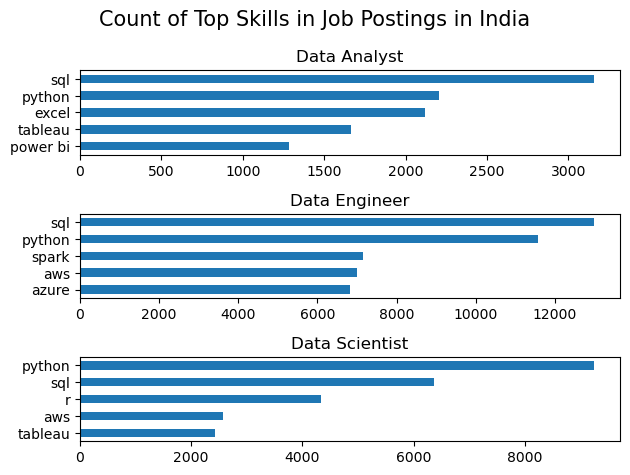

In [9]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Count of Top Skills in Job Postings in India", fontsize=15)
fig.tight_layout()
plt.show()

### Convert Counts to Percentages
#### **Focus: Counts don't show what portions of jobs are requesting these skills**
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the `value_counts()` method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to `job_title_short` and `total`. The DataFrame `df_job_title_count` now holds a list of job titles alongside their total occurrences.

In [10]:
# # Use original df to get the count of job titles
df_job_title_count = df_IND['job_title_short'].value_counts().reset_index(name='job_counts')

df_job_title_count

,job_title_short,job_counts
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the percentages. First merge `df_skills_count` and `df_job_title_count`, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [11]:
df_skills_per = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_per['skill_percentage'] = 100 * df_skills_per['skill_count'] / df_skills_per['job_counts']

df_skills_per

,job_skills,job_title_short,skill_count,job_counts,skill_percentage
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


### Plot Percentage Count
Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

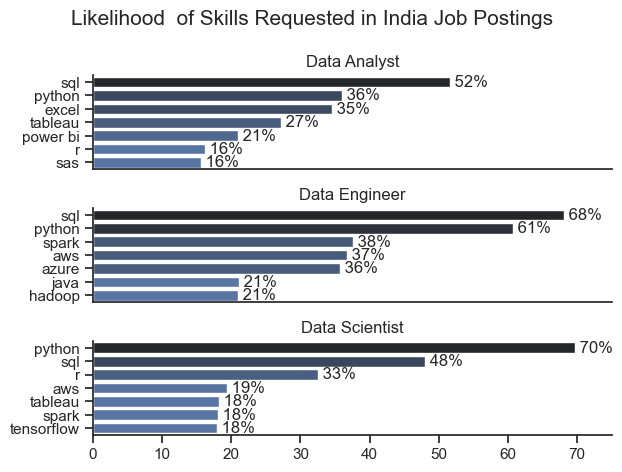

In [25]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(7)
    sns.barplot(data=df_plot,
                x='skill_percentage',
                y='job_skills',
                ax = ax[i],
                hue='skill_count',
                palette='dark:b_r')
    sns.despine()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)

    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v, n, f'{v: .0f}%', va='center')

fig.suptitle("Likelihood  of Skills Requested in India Job Postings", fontsize=15)
fig.tight_layout()
plt.show()

In [13]:
# Save the g

## Let's find the Likelihood  of Skills Requested in United States Job Postings

### Filter Data for the United States
Filter the data for the market of the United States.

In [14]:
df_US = df[df['job_country'] == 'United States']

# Explode Skills
Converts the `job_skills` column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the `job_title` and `job_skills` columns, allowing us to analyze the distribution of skills across different data job titles.

In [24]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


### Count Skills per Job Title
Groups DataFrame by `job_skills` and `job_title_short`, counting the occurrences of each skill within each job title.

Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. 

The final DataFrame, `df_skills_count`, shows the frequency of each skill with each job title.

In [16]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

In [17]:
# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [18]:
# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


### Create List of Top 3 Roles
#### Focus: Data Analysts, Data Engineers, and Data Scientists
Filter the job titles based on the most popular.

In [19]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
 
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plot Skill Counts
Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

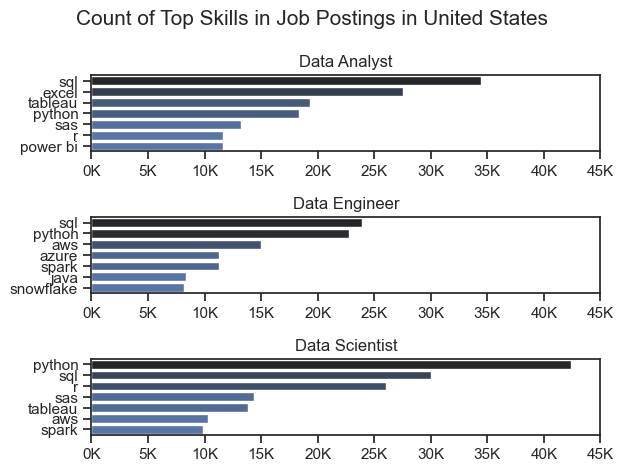

In [26]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(7)
    sns.barplot(data=df_plot,
                x='skill_count',
                y='job_skills',
                hue='skill_count',
                palette='dark:b_r',
                ax=ax[i])
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 45000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax[i].legend().remove()

fig.suptitle("Count of Top Skills in Job Postings in United States", fontsize=15)
fig.tight_layout()
plt.show()

### Convert Counts to Percentages
#### **Focus: Counts don't show what portions of jobs are requesting these skills**
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the `value_counts()` method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to `job_title_short` and `total`. The DataFrame `df_job_title_count` now holds a list of job titles alongside their total occurrences.

In [21]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_totals')

df_job_title_count

,job_title_short,job_totals
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


Then we calculate the percentages. First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [22]:
df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skill_perc['skill_percentage'] = 100 * df_skill_perc['skill_count'] / df_skill_perc['job_totals']

df_skill_perc

,job_skills,job_title_short,skill_count,job_totals,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plot Percentage Count
Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. 

After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

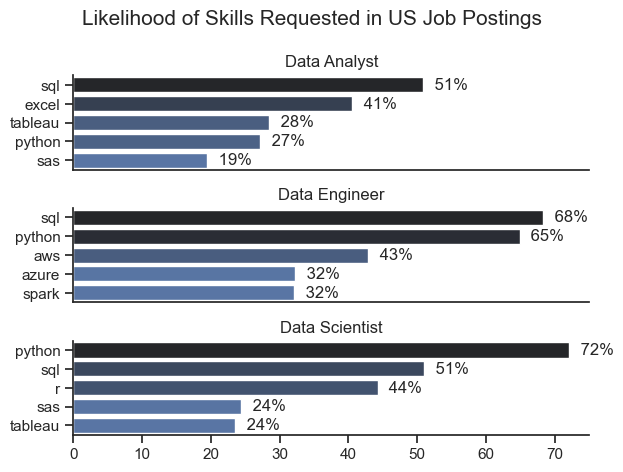

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot,
                x='skill_percentage',
                y='job_skills',
                hue='skill_count',
                palette='dark:b_r',
                ax=ax[i],
                legend=False)
    sns.despine()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 75)

    # # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1, n, f'{v: .0f}%', va='center')

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.tight_layout()
plt.show()